# Matplotlib

Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python.

Una de las características más importantes de Matplotlib es su capacidad para funcionar bien con muchos sistemas operativos y backends gráficos. Matplotlib admite docenas de backends y tipos de salida, lo que significa que puede contar con que funcionará independientemente del sistema operativo que esté utilizando o del formato de salida que desee, es decir tiene un enfoque multiplataforma.

En los últimos años, sin embargo, la interfaz y el estilo de Matplotlib han comenzado a mostrar su edad. Las herramientas más nuevas como ggplot y ggvis en el lenguaje R, junto con los kits de herramientas de visualización web basados en D3js y HTML5 canvas, a menudo hacen que Matplotlib se vea anticuado. Aún así, no podemos ignorar la fortaleza de Matplotlib como un motor gráfico multiplataforma bien probado.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

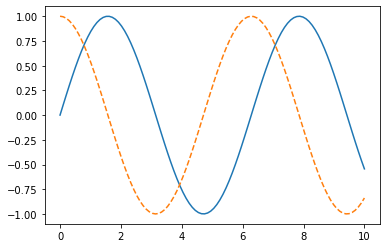

In [2]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Guardando una imagen..

Una característica interesante de Matplotlib es la capacidad de guardar figuras en una amplia variedad de formatos. Se puede guardar una figura usando el comando savefig(). Por ejemplo, para guardar la figura anterior como un archivo PNG, puede ejecutar esto:

In [3]:
fig.savefig('my_figure.png')

### Interfaz orientada a objetos

La interfaz orientada a objetos está disponible para estas situaciones más complicadas y para cuando desee tener más control sobre su figura. En lugar de depender de alguna noción de figura o ejes "activos", en la interfaz orientada a objetos las funciones de trazado son métodos de objetos Figura y Ejes explícitos. Para volver a crear el gráfico anterior con este estilo de trazado, puede hacer lo siguiente:

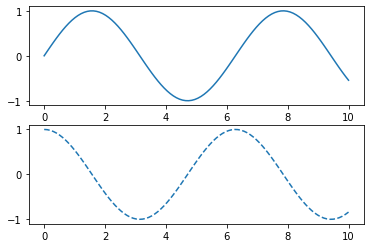

In [4]:
# Primero crea una grilla de plots
# ax será una matriz de dos objetos tipo Axes (ejes)
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x), '--');

### Colores de línea y estilos

El primer ajuste que quizás desee realizar en un gráfico es controlar los colores y estilos de las líneas. La función `plt.plot()` toma argumentos adicionales que se pueden usar para especificarlos. Para ajustar el color, puede utilizar la palabra clave **color**, que acepta un argumento de cadena que representa prácticamente cualquier color imaginable. El color se puede especificar de varias formas:

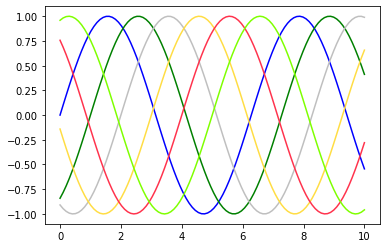

In [5]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x - 0), color='blue')        # especificar color por el nombre
plt.plot(x, np.sin(x - 1), color='g')           # codigo de color (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # escala de grises entre 0 y 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # codigo hex (RRGGBB desde 00 a FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # tupla RGB, valores de 0 a 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # todos los nombres de colores HTML soportados

Si no se especifica ningún color, Matplotlib recorrerá automáticamente un conjunto de colores predeterminados para varias líneas.

De manera similar, el estilo de línea se puede ajustar usando la palabra clave `linestyle`:

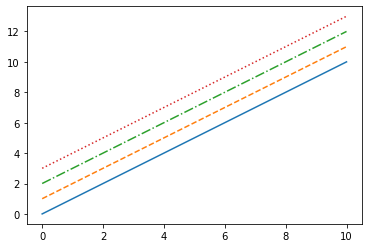

In [6]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

## Scatter plots

Otro tipo de diagrama de uso común es el diagrama de dispersión (scatter) simple, un primo cercano del diagrama de líneas. En lugar de que los puntos estén unidos por segmentos de línea, aquí los puntos se representan individualmente con un punto, círculo u otra forma. Comenzaremos configurando el cuaderno para graficar e importar las funciones que usaremos:

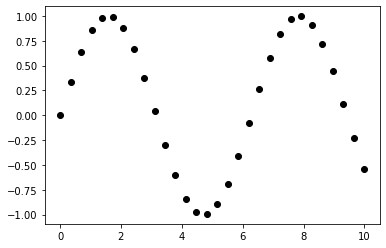

In [7]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

El tercer argumento en la llamada a la función es un carácter que representa el tipo de símbolo utilizado para el trazado. Así como puede especificar opciones como '-', '--'para controlar el estilo de línea, el estilo de marcador tiene su propio conjunto de códigos de cadena corta. La lista completa de símbolos disponibles se puede ver en la documentación de plt.plot, o en la documentación en línea de Matplotlib. La mayoría de las posibilidades son bastante intuitivas y mostraremos algunas de las más comunes aquí:

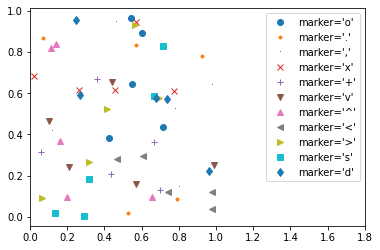

In [8]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

## Visualizar error

##### Barra de error básica

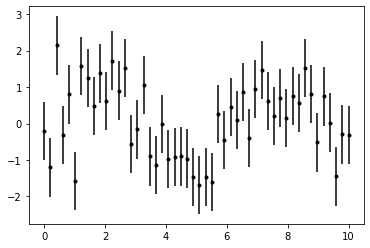

In [9]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

## Histogramas

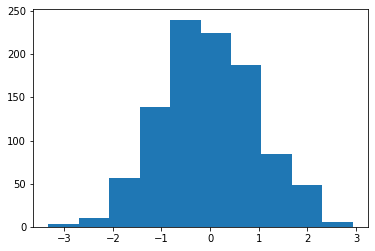

In [10]:
data = np.random.randn(1000)
plt.hist(data);


La `hist()` función tiene muchas opciones para ajustar tanto el cálculo como la visualización; aquí hay un ejemplo de un histograma más personalizado:

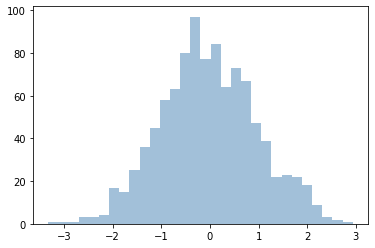

In [11]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

## Visualización de imagenes

Para ver un ejemplo de dónde esto podría ser útil, veamos una visualización interesante de algunos datos de dígitos escritos a mano. Estos datos se incluyen en Scikit-Learn y constan de casi 2000 imagenes de 8 × 8 que muestran varios dígitos escritos a mano.

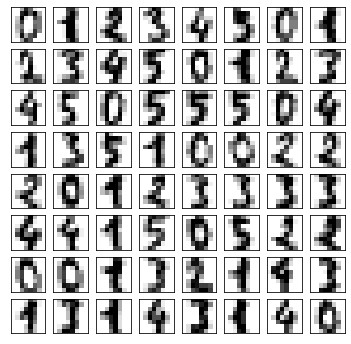

In [12]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])